<a href="https://colab.research.google.com/github/awangberg/AdvLinearAlgebra/blob/master/Project_4_Case_0_Solving_for_a_known_polynomial_function_using_Singular_Values_or_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function f(x) = 4 - 3x^2 + 5x^6
*   Case 1:  A known trigonometric function f(x) = 4 - 2*cos(x) + cos^2 (x)
*   Case 2:  An unknown matrix of data M (specified below)
*   Case 3:  An interesting case.

#  Case 0:  
We generate data for the polynomial function 
$$f(x) = 4 -3x^2 +5x^6$$ 
We know two things: The input (x) and the output (f(x)) for that input.  Pretend we know the (x, f(x)) pairs for **a lot** of different points, say $3$ of them.

We want to find out what combination of polynomials $1, x, x^2, x^3, x^4, x^5,$ and $x^6$ best matches the data.  For each input/output pair $(x, f(x))$, we generate one row of data in the system $Ac = b$:

$$ [  c_0 * 1 + c_1 * x + c_2 * x^2 + c_3 * x^3 + ... c_6 x^6 = f(x) ] $$

or

$$ \left[ \begin{array}{ccccccc} 1 & x & x^2 & x^3 & x^4 & x^5 & x^6 \end{array} \right] \left( \begin{array}{c} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\c_6 \\ \end{array} \right) = \left[ f(x) \right] $$


Be careful -- the unknowns are the coefficients in front - the $c_0, c_1, c_2, ..., c_6$ values.  Since we know $x$, then we know $x, x^2, x^3, x^4, ... x^6$. And we know the output $f(x)$ for that row.

So, if we know $x=2$ and $f(2) = 312$, then we populate the row as:

$$ [  c_0*1  + c_1*2 + c_2*4 + c_3*8 + ... + c_6*64 = -3.117 ] $$

or
$$ \left[ \begin{array}{ccccccc} 1 & 2 & 4 & 8 & 16 & x32 & 64 \end{array} \right] \left( \begin{array}{c} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\c_6 \\ \end{array} \right) = \left[ 312 \right] $$

where the vector $\vec{c}$ contains the unknowns $c_0, c_1, c_2, \ldots c_6$

So... let's generate the matrix:


In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in actual_data_x, actual_data_y
#
#We'll also set up a matrix system with augmented matrix M|b for using the system
#of best-fit:

best_fit_data = []
output_data = []
actual_data_x = []
actual_data_y = []
for i in range(3):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6
    best_fit_data.append([1, x, x**2, x**3, x**4, x**5, x**6])
    output_data.append([f])
    actual_data_x.append(x)
    actual_data_y.append(f)
# Now, put the data into M and b:
M = np.matrix(best_fit_data)
b = np.matrix(output_data)
#show the first five entries of b:
b[:5]

matrix([[3.98080733],
        [3.96547152],
        [3.37446277]])

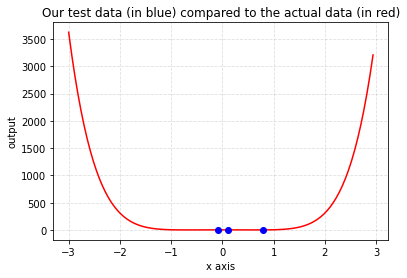

In [0]:
# We'll specify that x is a variable:
x = sym.symbols('x')
xdata = np.array(range(100))/16.667 - 3
fdata = 4 - 3*xdata**2 + 5*xdata**6

# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')


In [0]:
#  Find the best-fit line using any of the two methods that work from last class period:
#
#  Method 1:  M c = b  leads to    c = (M^T M)^(-1) M^T  b
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c


matrix([[  4.01650834],
        [ -0.01843406],
        [ -1.71038725],
        [ -0.48901144],
        [-11.35822731],
        [  2.70552478],
        [  2.21383763]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
"b is in the left column, M*c is in the middle column, and the right column gives b - M*c"
#We make a matrix, whose columns are [  b,  M*c,  b - M*c ]
#Then, we find the magnitude of these vectors.  If b-M*c is close to zero, we have a really good fit:
[((b.transpose()*b)[0,0])**0.5,  (((M*c).transpose() * (M*c))[0,0])**0.5,  (((b-M*c).transpose() * (b-M*c))[0,0])**0.5 ]

[6.554295567026534, 5.676293911186083, 3.847400377507425]

In [0]:
#  Method 2:  use singular value decomposition.
#
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

In [0]:
#  Show the matrix U:
U


array([[-0.42731968, -0.60575137, -0.67116553],
       [-0.45962343, -0.49371843,  0.73823331],
       [-0.77855263,  0.62394503, -0.06744192]])

In [0]:
#Show the matrix S:  (but notice only the singular values are stored, not the entire matrix)
S

array([1.9456815 , 0.91990678, 0.10166692])

In [0]:
#Show the matrix Vh:
Vh

array([[-0.85599608, -0.32657682, -0.25811399, -0.20253497, -0.16125879,
        -0.12844684, -0.10233306],
       [-0.51692713,  0.53546943,  0.42013682,  0.34267988,  0.27317769,
         0.21771576,  0.17345945],
       [-0.00368006,  0.77863445, -0.37971022, -0.32311916, -0.2665771 ,
        -0.21281086, -0.16963844],
       [ 0.00421393,  0.00625567, -0.51260993,  0.83796273, -0.13097731,
        -0.10444911, -0.08323436],
       [ 0.00351412,  0.01210228, -0.41418435, -0.13092273,  0.89414822,
        -0.08441357, -0.06726849],
       [ 0.00286194,  0.00994745, -0.33028769, -0.10440317, -0.0844116 ,
         0.93268427, -0.05364337],
       [ 0.00228318,  0.00799465, -0.26320105, -0.08319723, -0.0672665 ,
        -0.05364303,  0.95725229]])

In [0]:
#  The 2nd singular value is:
S[1]

0.9199067753985881

In [0]:
# We can also compare the matrix reconstructed from the SVD and the original matrix M:

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
a1 = np.dot(U, np.dot(sigma, Vh))
#does a1 approximate M?
np.allclose(M, a1)

True

In [0]:
#  If there are 3 non-zero singular values, we'll use the upper (3x3) submatrix of sigma and the
#  correspondingly sized submatrices for U and Vh.
#  We'll have to divide each of U, sigma, and Vh into matrices we want to use (U_use, Sigma_use, and Vh_use)
#  and the remaining blocks along the diagonal which we'll want to discard (U_d, Sigma_d, Vh_d)
useSigs = 3
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

In [0]:
#  We should be able to figure out the size of U and Vh that we'll use:
#
#  U S Vh  =   [         .     ] [             .         ]  [            .      ]
#              [ U_use   .     ] [  sigma_use  .         ]  [   Vh_use   .      ]
#              [         . U_d ] [.......................]  [            . Vh_d ]
#              [         .     ] [             . sigma_d ]  [            .      ]
#
#
#  Check that U_use, sigma_use, and Vh_use are the right sizes, as well as U_d, sigma_d, and Vh_d
U_use.shape
#sigma_use.shape
#Vh_use.shape
#U_d.shape
#sigma_d.shape
#Vh_d.shape

(3, 3)

In [0]:
#  If we use Singular Value Decomposition to break down A as a product of matrices
#  A = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  A_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Ax = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svd_sol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svd_sol

matrix([[ 3.43841851],
        [ 0.43252033],
        [-2.00932966],
        [-0.17030783],
        [-0.15529602],
        [-0.12475786],
        [-0.09959217]])

In [0]:
#  Both the above solutions give really bad approximations to the polynomial  f(x) = 4 -3x^2 +5x^6
#  Why?
#  Go back and modify the code so that you use *MORE DATA*

#  (Hint:  You have to change two of the '3' numbers in the code above:  One to generate more data; the other to use the right number of singular values for your data)